# How does partisan type influence affective polarization?

A comparative study of 25 European democracies

Tristan Muno [](https://orcid.org/0009-0002-3078-8436) (University of Mannheim)  
Thomas König [](https://orcid.org/0000-0002-1797-6662) (University of Mannheim)  
January 16, 2026

Space for an abstract.

We term identifiers, non-identifiers, and non-partisans.

## 1 Roadmap

This study examines variation in affective polarization (AP) along **three analytically distinct dimensions**:

1.  **Operationalization of partisanship**  
    Ingroup defined via **explicit partisan attachment** (identity-based) versus **vote intention/choice** (behavioral anchoring)

2.  **Measurement of polarization**  
    **Attitudinal polarization** (thermometer-based measures) versus **behavioral polarization** (conjoint outcomes)

3.  **External validity and scope conditions**  
    Cross-national variation in the prevalence and distribution of partisan types across European democracies

------------------------------------------------------------------------

## 2 Empirical strategy

### 2.1 1. Aggregate (European-level) patterns

First, we establish **European-level benchmarks** of affective polarization, conditioning on **partisan status** and **measurement strategy**.

-   Outcome: Affective polarization  
-   X-axis: Magnitude of AP  
-   Y-axis: Measurement type (API, Wagner MD, CJ-based AP)  
-   Shape / color: Partisan type (explicit partisan, implicit partisan, nonpartisan)

**Measurement logic**:

-   **API and CJ-based AP** rely on *identity-based ingroup–outgroup definitions* and allow direct comparison between **attitudinal** and **behavioral** polarization.
-   **Wagner’s measures** capture *perceived system-level affective differentiation* and uniquely allow inclusion of **nonpartisans**, providing a non-partisan baseline against which partisan polarization can be evaluated.

This step clarifies whether differences across partisan types reflect: - ingroup bias, - behavioral discrimination, - or broader differences in perceived affective structure.

### 2.2 2. Comparative analysis: cross-national variation

Second, we examine how these patterns **vary across countries**.

-   Compare the magnitude and dispersion of AP by partisan type within countries  
-   Assess whether identity-based and system-level polarization align or diverge cross-nationally  
-   Evaluate how the **distribution of partisan types** conditions observed levels of affective polarization

This step establishes the **external validity** of the individual-level findings and identifies contextual heterogeneity across European party systems.

``` python
toplot <- eu25games2019 |>
  select(meta_country, der_partisanship, meta_pid) |>
  distinct(meta_pid, .keep_all = T) |>
  filter(!is.na(der_partisanship)) |>
  group_by(meta_country) |>
  count(der_partisanship) |>
  mutate(
    total_n = sum(n),
    prop = n / total_n
  ) |>
  ungroup()

expl_prop <- toplot |>
  filter(der_partisanship == "1_pid_expl") |>
  select(meta_country, expl_prop = prop)

toplot <- toplot |>
  left_join(
    expl_prop,
    by = join_by(meta_country)
  ) |>
  mutate(
    meta_country = fct_reorder(meta_country, expl_prop),
    der_partisanship2 = case_when(
      der_partisanship == "1_pid_expl" ~ "Explicit",
      der_partisanship == "2_pid_impl" ~ "Implicit",
      der_partisanship == "3_nopid" ~ "None"
    )
  )

ggplot(
  toplot,
  aes(x = n, y = meta_country, fill = der_partisanship2)
) +
  geom_bar(
    stat = "identity",
    position = "fill",
    color = "black",
    width = 0.75
  ) +
  scale_fill_manual(
    values = c("white", "#CCCCCC", "black"),
    labels = c(
      bquote("Explicit (" * italic(T)[i] == 1 * ")"),
      bquote("Implicit (" * italic(T)[i] == 0 * ")"),
      expression(paste("None (", italic(T)[i] == phantom(0) * "\u2205", ")"))
    )
  ) +
  scale_x_continuous(labels = percent) +
  labs(
    x = "Share",
    y = "Country",
    fill = bquote("Partisan Type (" * italic(T)[i] * ")")
  ) +
  theme_pubr() +
  theme(
    aspect.ratio = 1 / 1.618034
  )
```

<figure id="fig-impl-expl-distribution">
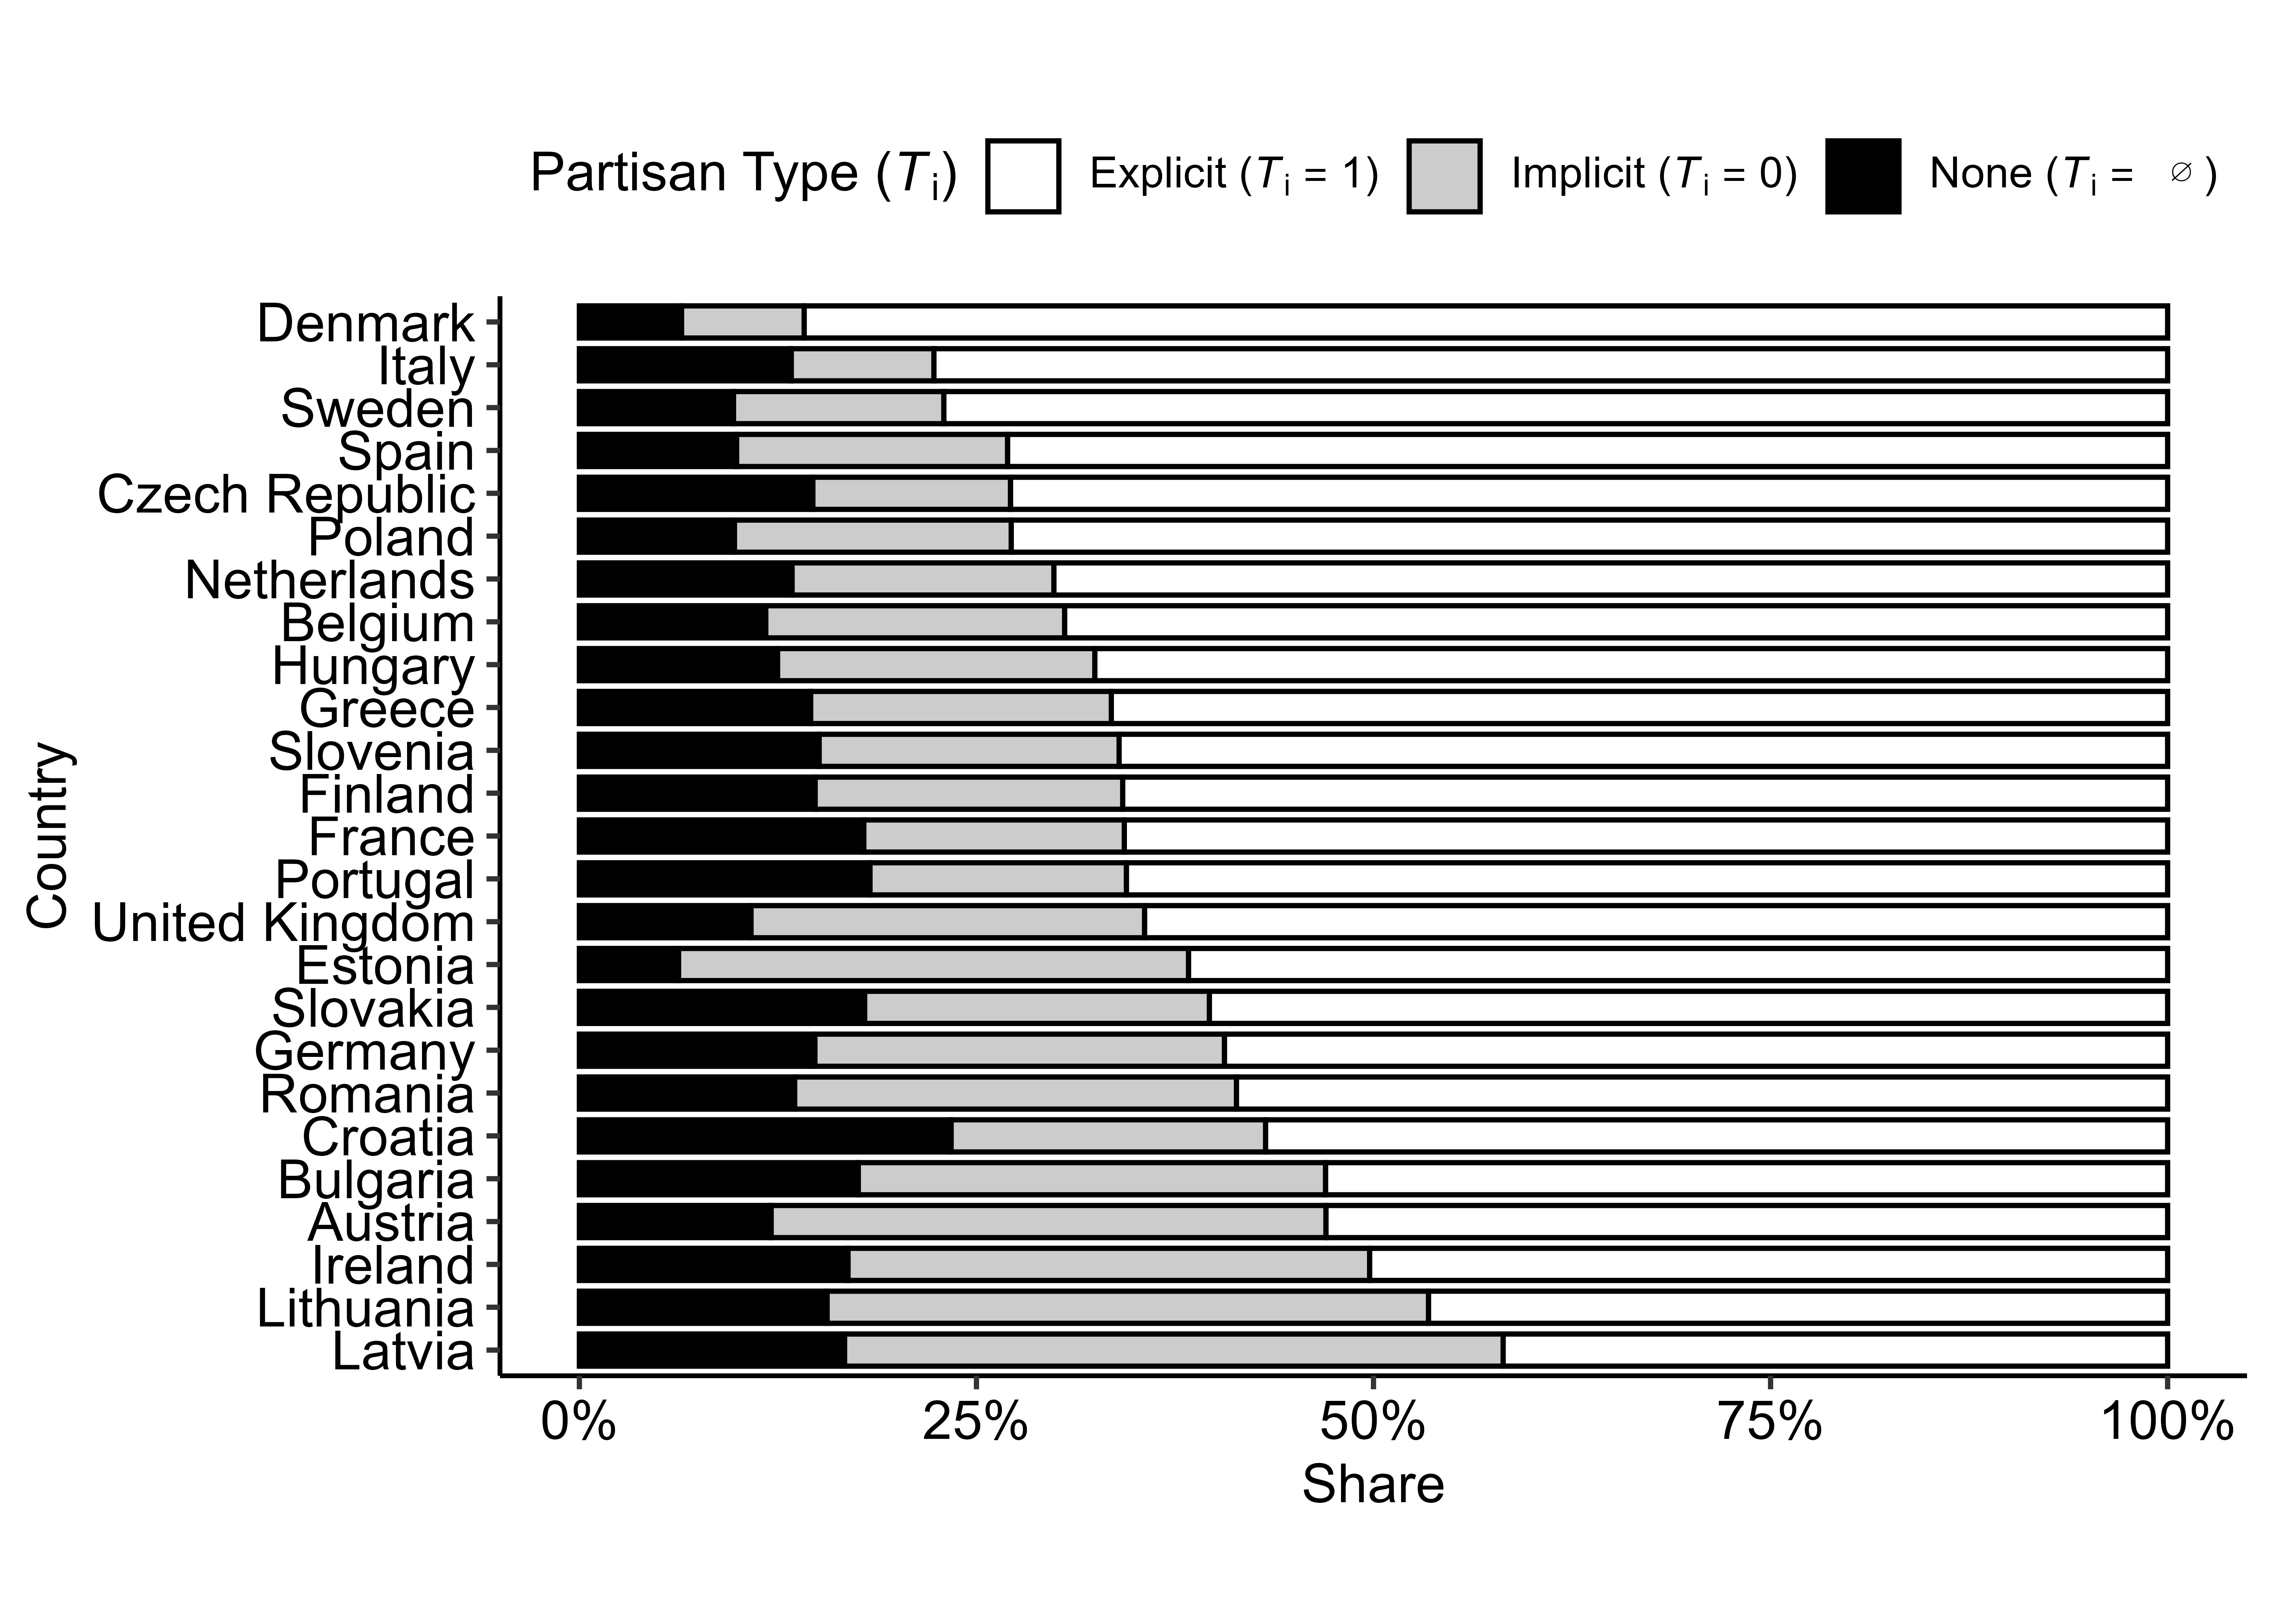
<figcaption>Figure 1: Distribution of partisan types, by country. Stacked horizontal bars show the within-country share (%) of three partisan types: explicit partisans (respondents who reported a subjective attachement to a party, <span class="math inline">\(T_i=1\)</span>), implicit partisans (respondents who reported no attachement but did report a vote preference or intention, <span class="math inline">\(T_i=0\)</span>), and respondents who reported neither (none, <span class="math inline">\(T_i = \emptyset\)</span>). Percentages sum to 100% within each country, with country samples containing about <span class="math inline">\(1,100\)</span> respondents each (detailed numbers are reported in appendix section X).</figcaption>
</figure>

## 3 Data

We use data from Hahm, Hilpert, and König ([2024](#ref-hahm2024divided)).

## 4 Measurement

We compare several measurement strategies frequently employed in the context of multi-party systems.

For our behavioral experiment, we conceptually follow Reiljan’s API

## 5 Results

``` python
toplot <- bind_rows(
  pooled_ap_cj,
  pooled_ap_thermo
)

ggplot(
  toplot,
  aes(
    x = ap,
    y = der_partisan_type,
    shape = factor(weighted),
    color = measurement
  )
) +
  # 1) Points nudged based on weight
  geom_point(
    position = position_nudge(y = ifelse(toplot$weighted == 1, 0.1, -0.1))
  ) +

  # 2) Error bars nudged the same way and linetype depending on weight
  geom_errorbar(
    aes(
      xmin = ci_low,
      xmax = ci_high
    ),
    position = position_nudge(y = ifelse(toplot$weighted == 1, 0.1, -0.1)),
    width = 0.1
  ) +
  labs(
    y = "Sample",
    x = "AP",
    shape = "Party Weight",
    color = "Measurement"
  ) +
  geom_vline(
    xintercept = 0,
    linetype = "dashed"
  ) +
  theme_pubr() +
  theme(aspect.ratio = 1 / 1.618)
```

<figure id="fig-eu25-ap">
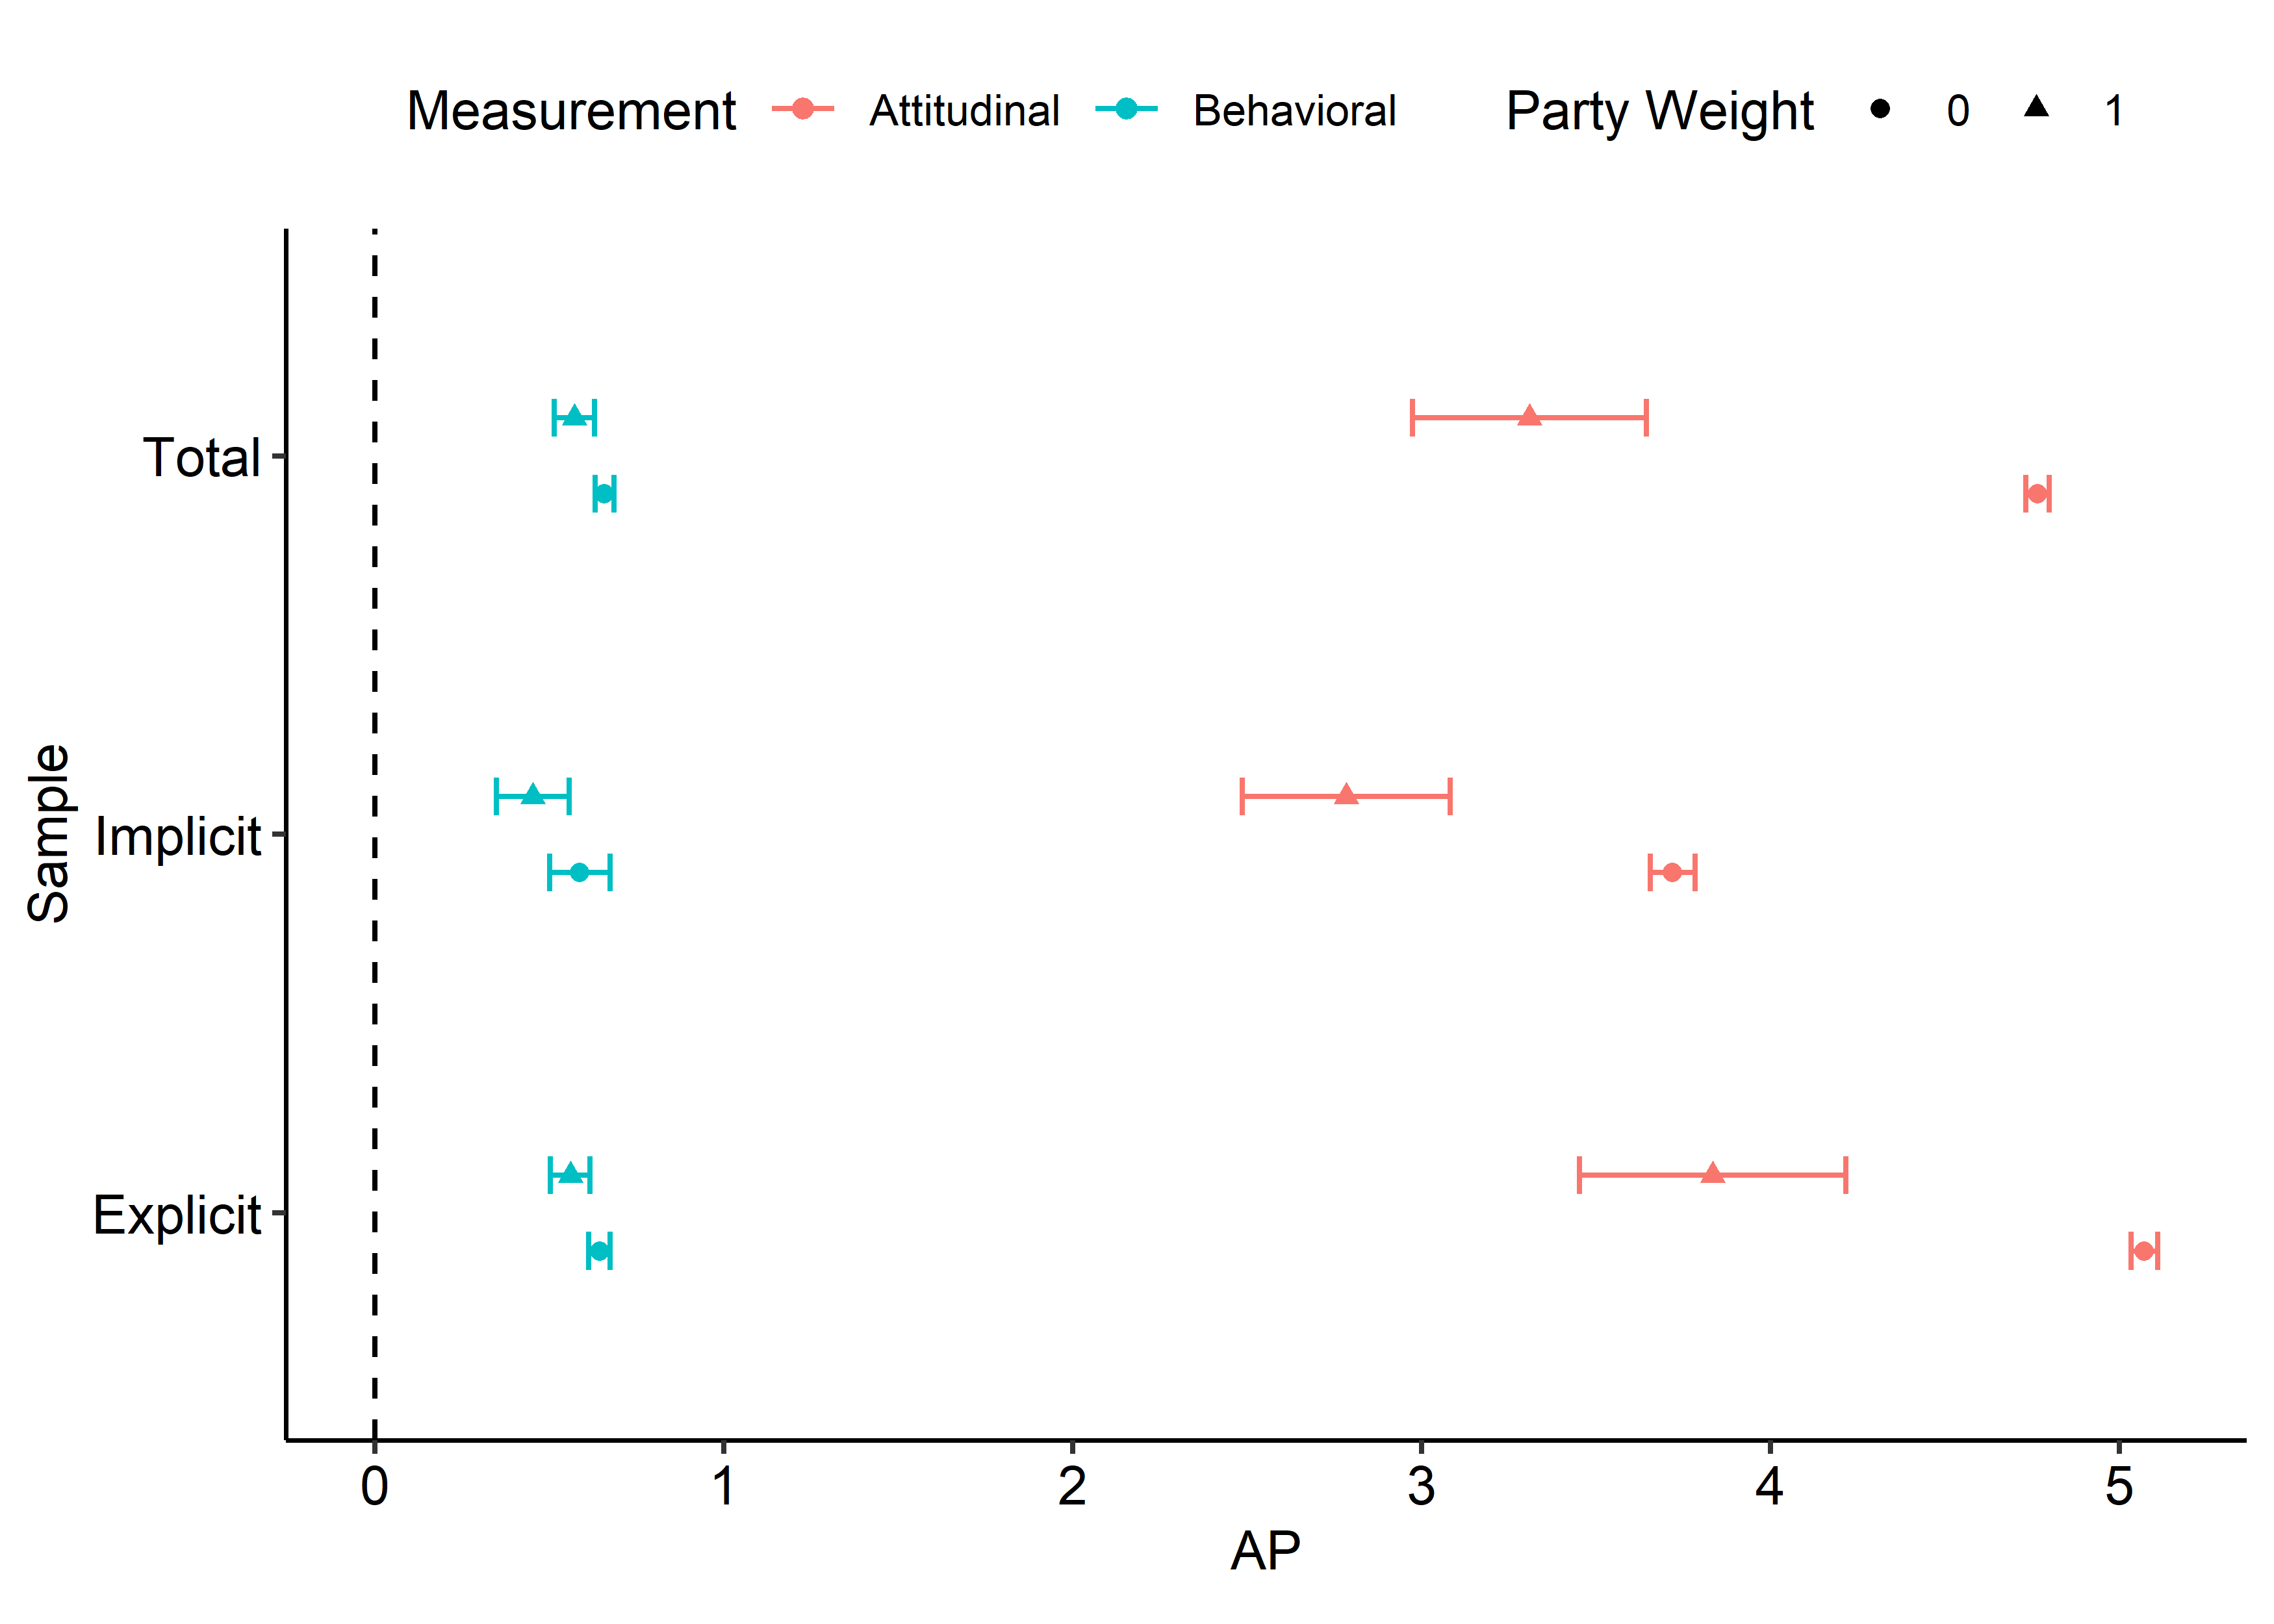
<figcaption>Figure 2: Affective Polarization in EU25 (2019). Note: 1) Explicit: Reported Attachement; Implicit: Denied Attachement but Reported Vote; Total: All Partisans (Expl. and Impl.). 2) Errorbars represent 95% CI. 3) Weighted estimates and errorbars are based on empirical distribution of reported votes in our data. 4) Behavioral Scale (Token): -10 (10 Token allocated to Out-Party and none to Co-Party) to +10 (10 Token allocated to Co-party and 0 to Out-Party); Attitudinal Scale (Thermo): -10 (Thermoscore 10 for Out-Party and 0 for Co-Party) to +10 (Thermoscore 10 for Co-Party and 0 for Out-Party).</figcaption>
</figure>

## 6 Limitations

Our findings remain limited due to the cross-national nature of our data.

When weighting affective polarization by party size to estimate country — or Europe-level scores, this procedure implicitly assumes that the probability of any individual encountering and correctly identifying another partisan is proportional to the size of parties’ electorates. In practice, structural factors may violate this assumption: for example, partisans of smaller or more radical challenger parties may be more salient or more easily recognized, such that their social visibility exceeds their electoral share. Consequently, weighted estimates may over- or understate true horizontal affective polarization in contexts where partisan recognition is systematically biased.

## 7 References

Hahm, Hyeonho, David Hilpert, and Thomas König. 2024. “Divided We Unite: The Nature of Partyism and the Role of Coalition Partnership in Europe.” *American Political Science Review* 118 (1): 69–87. <https://doi.org/10.1017/S0003055423000266>.

## 8 Appendix

### 8.1 Sample descriptives

``` python
eu25games2019 |>
  distinct(meta_pid, .keep_all = T) |>
  tabyl(
    meta_country
  ) |>
  adorn_rounding(2) |>
  adorn_totals() |>
  knitr::kable(col.names = c("Country", "N", "Percent"))
```

| Country        |     N | Percent |
|:---------------|------:|--------:|
| Austria        |  1277 |    0.04 |
| Belgium        |  1305 |    0.04 |
| Bulgaria       |   982 |    0.03 |
| Croatia        |  1240 |    0.04 |
| Czech Republic |  1135 |    0.04 |
| Denmark        |  1200 |    0.04 |
| Estonia        |   944 |    0.03 |
| Finland        |  1160 |    0.04 |
| France         |  1156 |    0.04 |
| Germany        |  1188 |    0.04 |
| Greece         |  1161 |    0.04 |
| Hungary        |   986 |    0.03 |
| Ireland        |  1061 |    0.04 |
| Italy          |  1172 |    0.04 |
| Latvia         |  1148 |    0.04 |
| Lithuania      |  1265 |    0.04 |
| Netherlands    |  1221 |    0.04 |
| Poland         |  1198 |    0.04 |
| Portugal       |  1187 |    0.04 |
| Romania        |  1480 |    0.05 |
| Slovakia       |  1297 |    0.04 |
| Slovenia       |  1135 |    0.04 |
| Spain          |  1396 |    0.05 |
| Sweden         |  1254 |    0.04 |
| United Kingdom |  1279 |    0.04 |
| Total          | 29827 |    0.99 |

Table 1: Sample composition by country. Numbers denote respondents.

``` python
eu25games2019 |>
  distinct(meta_pid, .keep_all = T) |>
  tabyl(
    meta_country,
    q_gender
  ) |>
  adorn_totals() |>
  knitr::kable(
    col.names = c("Country", "Male", "Female", "Other")
  )
```

| Country        |  Male | Female | Other |
|:---------------|------:|-------:|------:|
| Austria        |   645 |    630 |     2 |
| Belgium        |   729 |    574 |     2 |
| Bulgaria       |   463 |    518 |     1 |
| Croatia        |   545 |    694 |     1 |
| Czech Republic |   515 |    618 |     2 |
| Denmark        |   690 |    508 |     2 |
| Estonia        |   331 |    611 |     2 |
| Finland        |   586 |    567 |     7 |
| France         |   562 |    594 |     0 |
| Germany        |   587 |    597 |     4 |
| Greece         |   588 |    572 |     1 |
| Hungary        |   493 |    492 |     1 |
| Ireland        |   481 |    577 |     3 |
| Italy          |   603 |    569 |     0 |
| Latvia         |   415 |    733 |     0 |
| Lithuania      |   462 |    803 |     0 |
| Netherlands    |   642 |    577 |     2 |
| Poland         |   540 |    658 |     0 |
| Portugal       |   593 |    593 |     1 |
| Romania        |   837 |    641 |     2 |
| Slovakia       |   550 |    746 |     1 |
| Slovenia       |   569 |    566 |     0 |
| Spain          |   677 |    718 |     1 |
| Sweden         |   648 |    602 |     4 |
| United Kingdom |   635 |    641 |     3 |
| Total          | 14386 |  15399 |    42 |

Table 2: Sample composition by country and gender. Numbers denote respondents.

``` python
eu25games2019 |>
  distinct(meta_pid, .keep_all = TRUE) |>
  group_by(meta_country) |>
  summarise(
    `18-25` = sum(q_age >= 18 & q_age <= 25, na.rm = T),
    `26-35` = sum(q_age >= 26 & q_age <= 35, na.rm = T),
    `36-45` = sum(q_age >= 36 & q_age <= 45, na.rm = T),
    `46-55` = sum(q_age >= 46 & q_age <= 55, na.rm = T),
    `56-65` = sum(q_age >= 56 & q_age <= 65, na.rm = T),
    `66-75` = sum(q_age >= 66 & q_age <= 75, na.rm = T),
    `>76` = sum(q_age >= 76, na.rm = T)
  ) |>
  adorn_totals() |>
  knitr::kable(
    col.names = c(
      "Country",
      "18 to 25",
      "26 to 35",
      "36 to 45",
      "46 to 55",
      "56 to 65",
      "66 to 75",
      "> 75"
    )
  )
```

| Country        | 18 to 25 | 26 to 35 | 36 to 45 | 46 to 55 | 56 to 65 | 66 to 75 | \> 75 |
|:-------------|---------|---------|---------|---------|---------|---------|-----:|
| Austria        | 144      | 177      | 249      | 263      | 286      | 142      |     0 |
| Belgium        | 197      | 132      | 160      | 235      | 333      | 239      |     3 |
| Bulgaria       | 57       | 195      | 231      | 250      | 212      | 33       |     0 |
| Croatia        | 119      | 251      | 272      | 331      | 205      | 47       |     0 |
| Czech Republic | 88       | 187      | 227      | 219      | 281      | 126      |     0 |
| Denmark        | 132      | 134      | 139      | 208      | 321      | 249      |     4 |
| Estonia        | 56       | 168      | 164      | 283      | 265      | 7        |     0 |
| Finland        | 125      | 178      | 210      | 242      | 259      | 137      |     1 |
| France         | 123      | 176      | 242      | 267      | 279      | 51       |     0 |
| Germany        | 125      | 184      | 200      | 240      | 313      | 117      |     0 |
| Greece         | 77       | 202      | 376      | 318      | 136      | 34       |     0 |
| Hungary        | 51       | 175      | 196      | 166      | 273      | 117      |     1 |
| Ireland        | 128      | 216      | 223      | 187      | 169      | 120      |     0 |
| Italy          | 104      | 196      | 264      | 195      | 294      | 98       |     2 |
| Latvia         | 78       | 251      | 231      | 338      | 239      | 6        |     0 |
| Lithuania      | 223      | 311      | 257      | 250      | 212      | 2        |     0 |
| Netherlands    | 149      | 126      | 161      | 234      | 340      | 194      |     3 |
| Poland         | 200      | 342      | 222      | 187      | 196      | 42       |     0 |
| Portugal       | 112      | 260      | 289      | 231      | 218      | 67       |     1 |
| Romania        | 128      | 339      | 373      | 347      | 202      | 65       |     0 |
| Slovakia       | 139      | 223      | 282      | 290      | 250      | 108      |     1 |
| Slovenia       | 97       | 186      | 246      | 284      | 234      | 72       |     0 |
| Spain          | 125      | 293      | 355      | 305      | 228      | 66       |     1 |
| Sweden         | 124      | 165      | 156      | 234      | 297      | 261      |     3 |
| United Kingdom | 121      | 184      | 196      | 234      | 268      | 250      |     1 |
| Total          | 3022     | 5251     | 5921     | 6338     | 6310     | 2650     |    21 |

Table 3: Sample composition by country and age group. Numbers denote respondents.

### 8.2 Experimental setup

Before the behavioral games, Hahm, Hilpert, and König ([2024](#ref-hahm2024divided)) presented respondents a short background information overview and instructions. For the dictator game, these were: *This game is played by pairs of individuals.* *Each pair is made up of a Player 1 and a Player 2.* *Each player will have some information about the other player, but you will not be told who the other players are during or after the experiment.* *The game is conducted as follows: A sum of 10 tokens will be provisionally allocated to Player 1 at the start of each round.* *Player 1 will then decide how much of the 10 tokens to offer to Player 2.* *Player 1 could give some, all, or none of the 10 tokens.* *Player 1 keeps all tokens not given to Player 2.* *Player 2 gets to keep all the tokens Player 1 offers.* *You will play this game three times with three different people.* In the trust game, the provided information and instruction were: *This game is played by pairs of individuals.* *Each pair is made up of a Player 1 and a Player 2.* *Each player will have some information about the other player, but you will not be told who the other players are during or after the experiment.* *Each player will receive 10 tokens.* *Player 1 then has the opportunity to give a portion of his or her 10 tokens to Player 2.* *Player 1 could give some, all, or none of the 10 tokens.* *Whatever amount Player 1 decides to give to Player 2 will be tripled before it is passed on to Player 2.* *Player 2 then has the option of returning any portion of this tripled amount to Player 1.* *Then, the game is over.* *Player 1 receives whatever he or she keeps from the original 10 tokens, plus anything returned to him or her by Player 2. Player 2 receives their original 10 tokens, plus whatever he or she keeps after returning any portion of the tripled amount to Player 1.* *You will play this game three times, with three different people.* *The more tokens you obtain, the more successful you will be.*

In both games respondents were shown a tabular overview of Player 2 after the instructions. <a href="#fig-example-profile" class="quarto-xref">Figure 3</a> shows an example of such a profile along with the interface respondents were provided to assign the 10 tokens. Each round, a new profile was displayed to respondents.

<figure id="fig-example-profile">
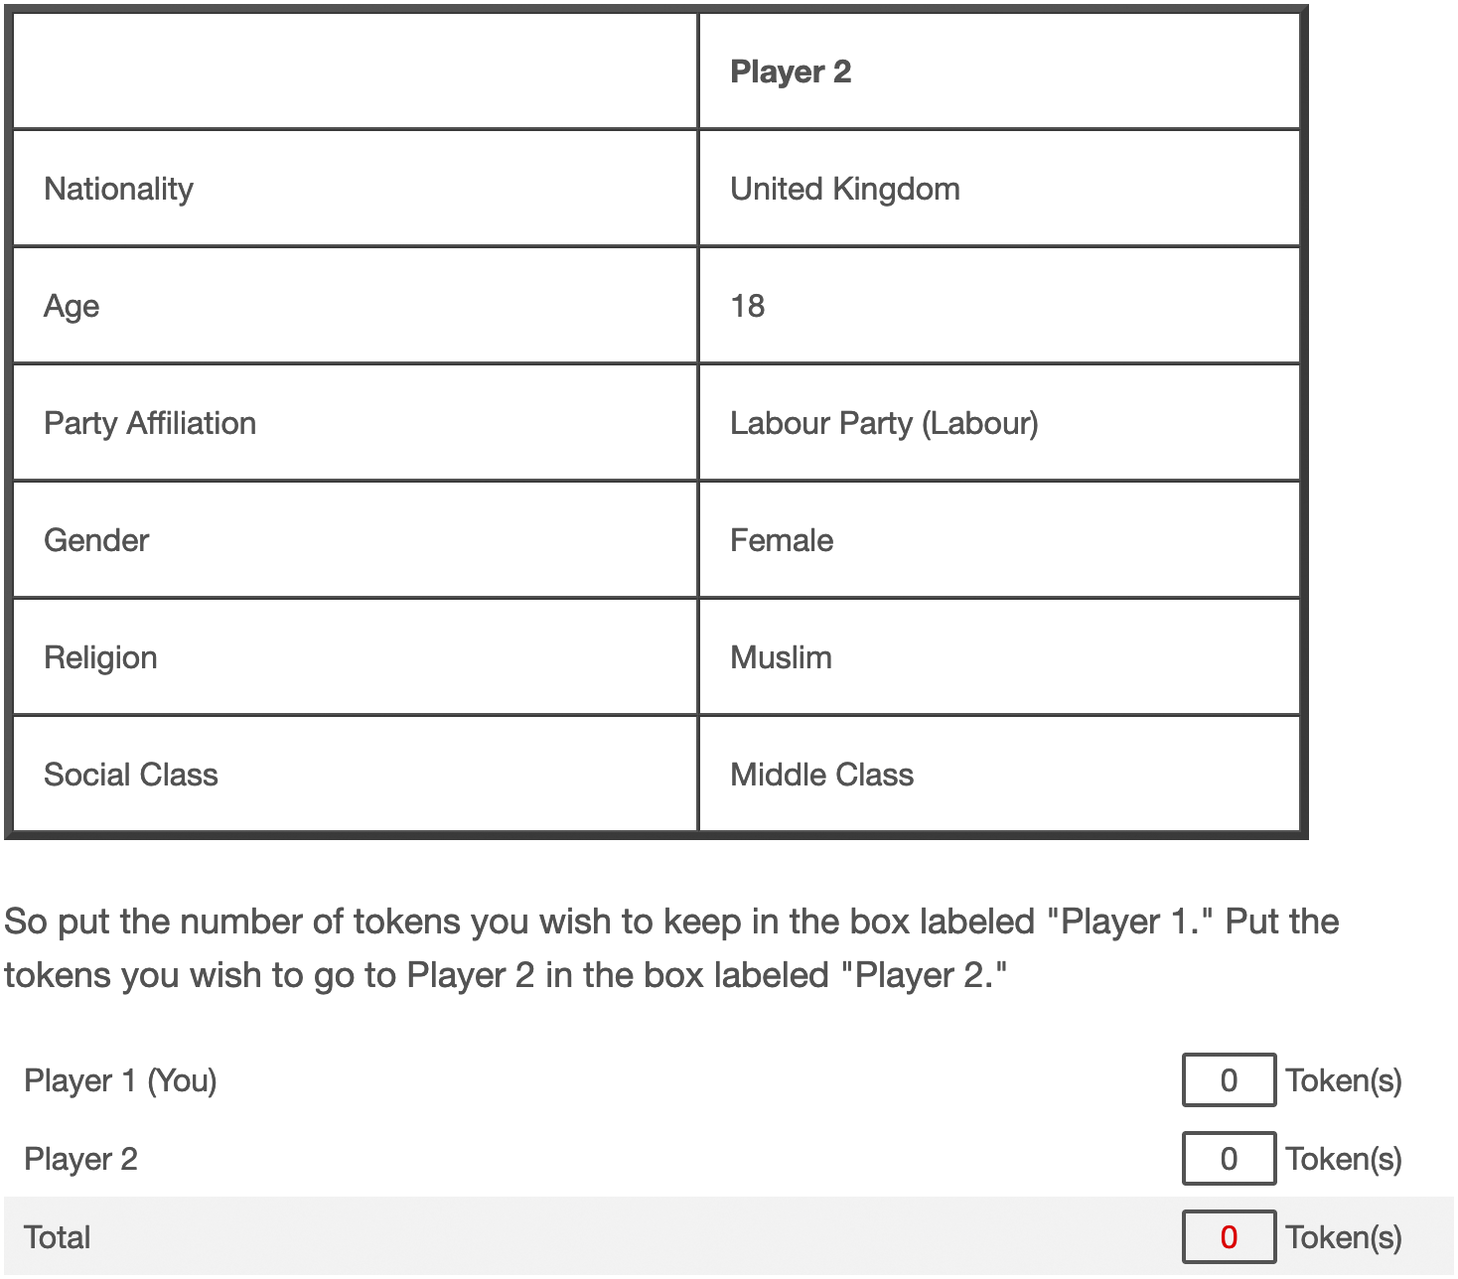
<figcaption>Figure 3: Example of potential co-player profile.</figcaption>
</figure>

### 8.3 Distribution of Y

``` python
summary_stats <- df_modelvars %>%
  group_by(meta_game_lab) %>%
  summarise(
    mean_token = mean(cj_token, na.rm = TRUE),
    median_token = median(cj_token, na.rm = TRUE),
    sd_token = sd(cj_token, na.rm = TRUE)
  )


df_modelvars |>
  select(cj_token, meta_game_lab) |>
  ggplot(
    aes(x = log(cj_token + 1), fill = meta_game_lab)
  ) +
  geom_histogram(
    position = position_dodge(),
    color = "black"
  ) +
  # scale_x_continuous(
  #   breaks = 0:10,
  #   labels = 0:10
  # ) +
  scale_fill_manual(
    values = c("white", "gray")
  ) +
  labs(
    x = "Tokens allocated (Y)",
    y = "N",
    fill = "Conjoint Game"
  ) +
  ggpubr::theme_pubr()
```

    `stat_bin()` using `bins = 30`. Pick better value `binwidth`.

<figure id="fig-distr-y">
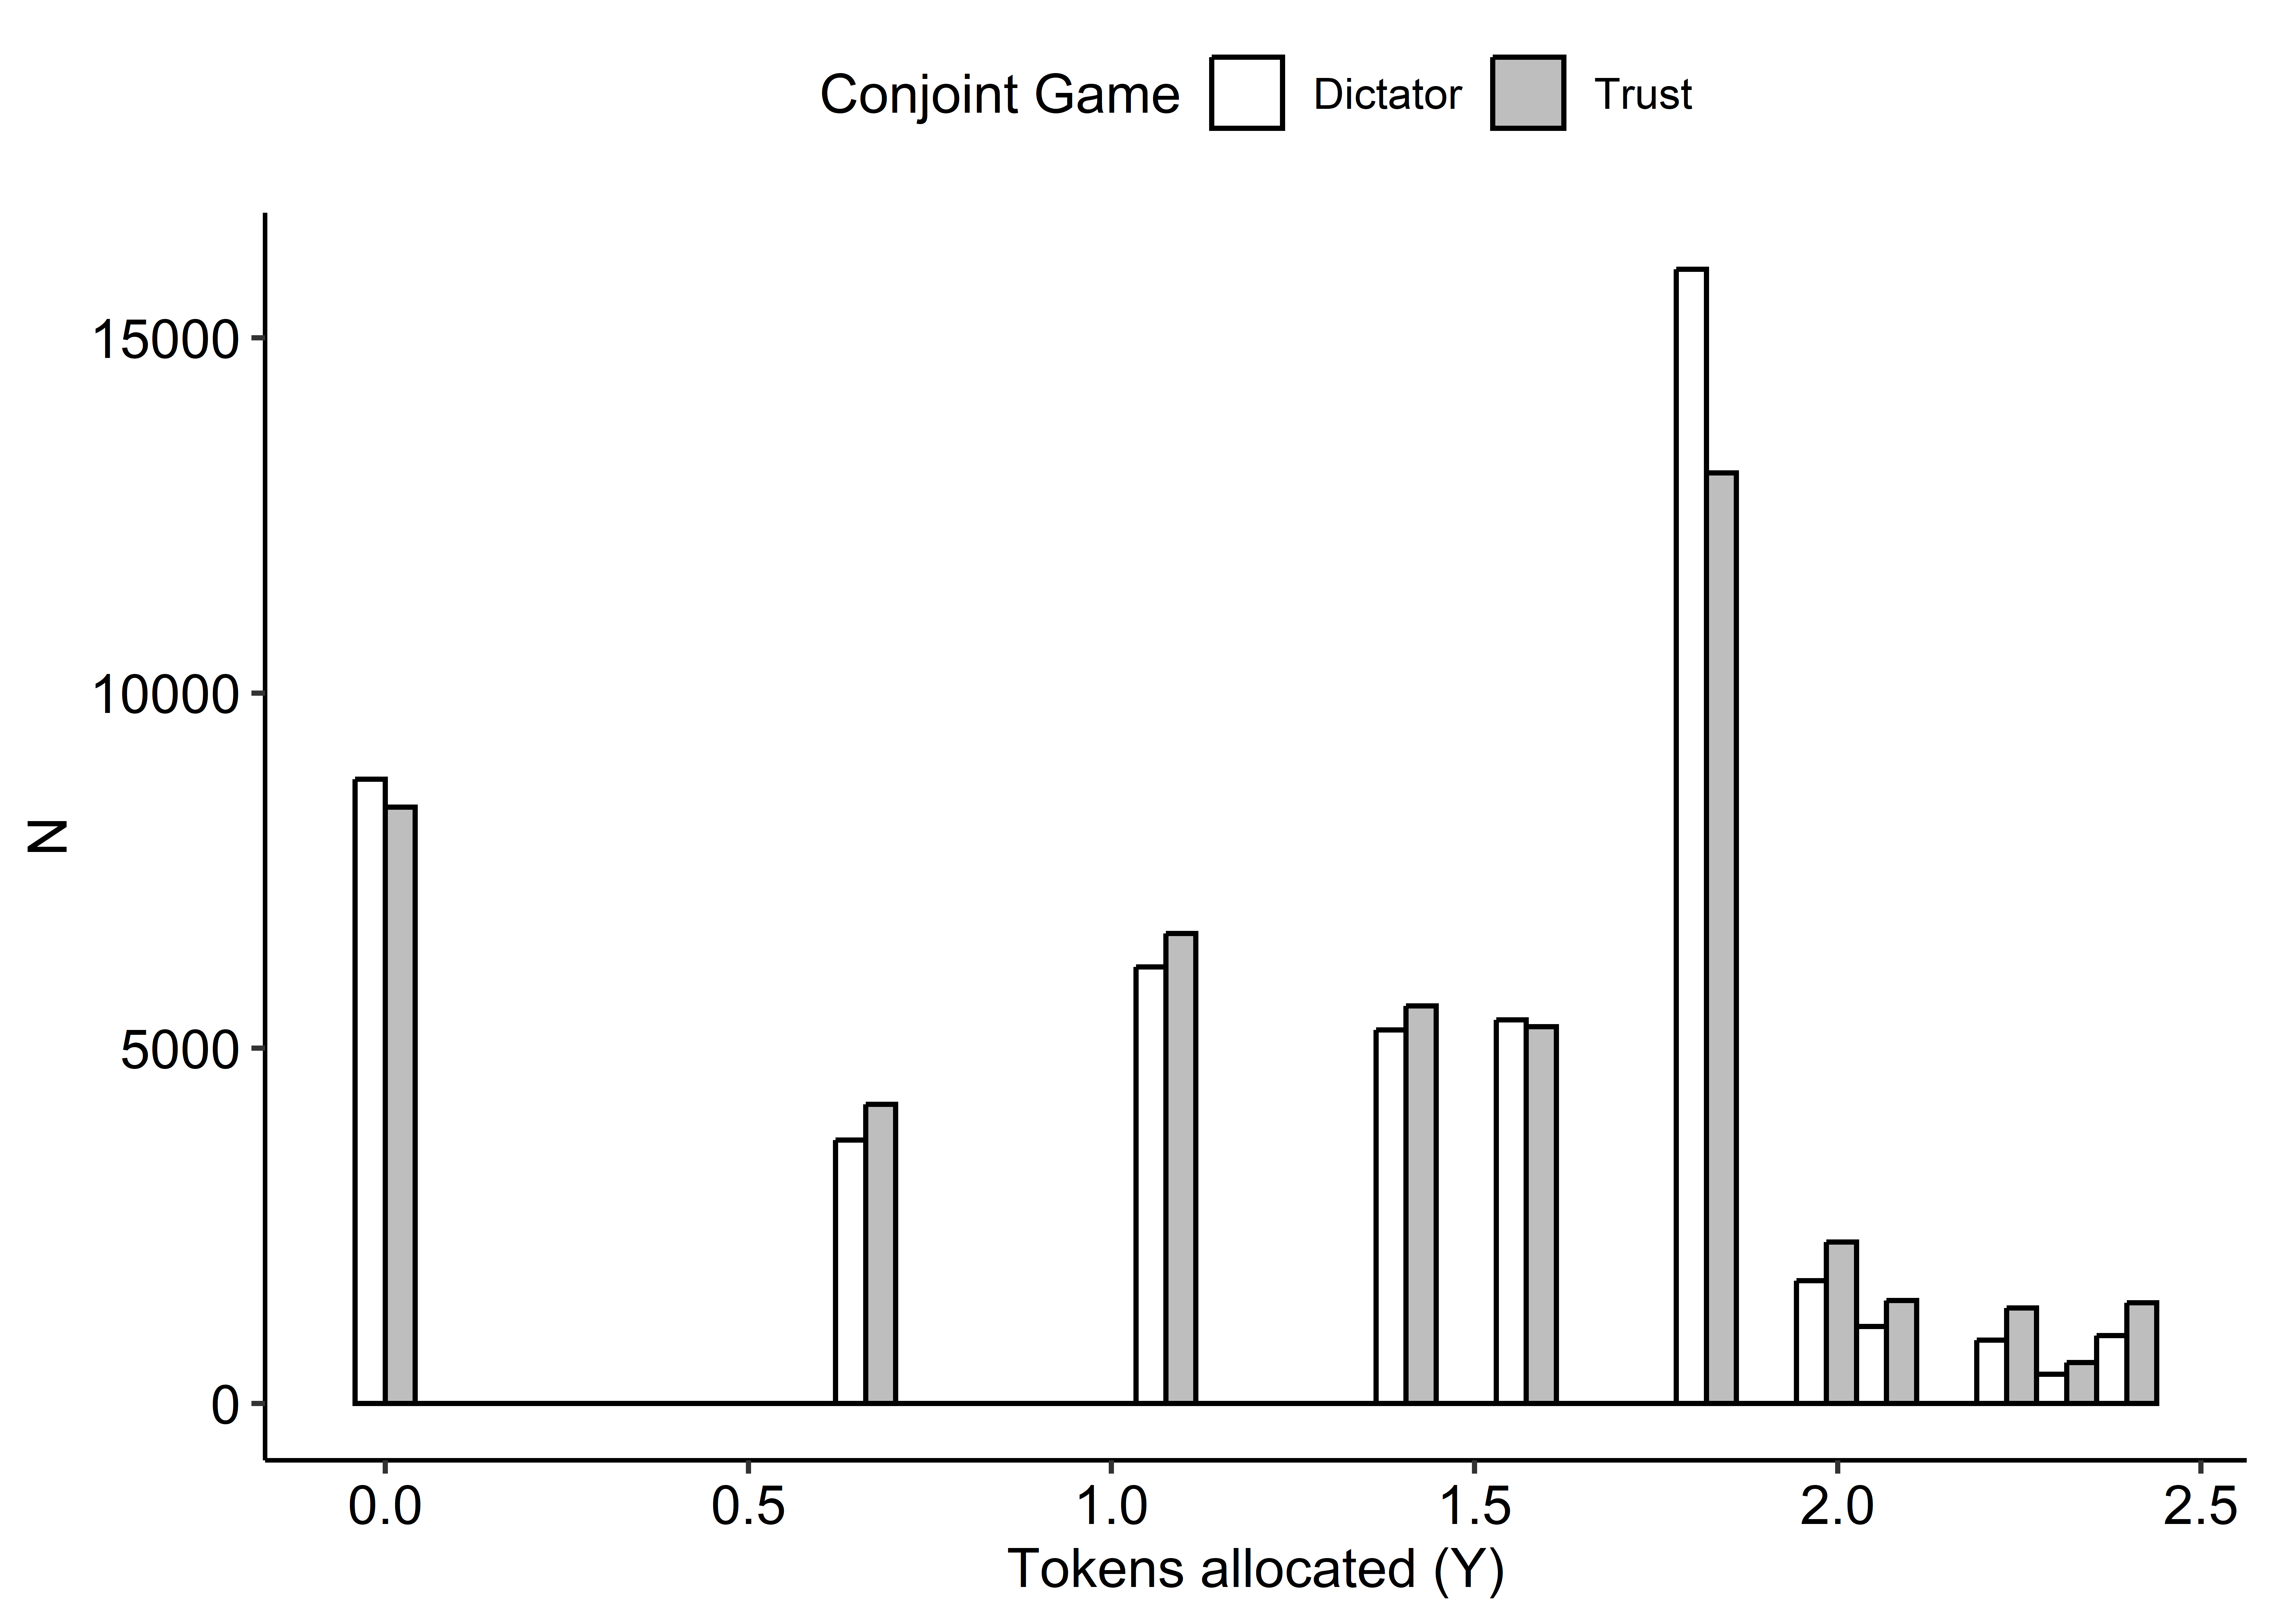
<figcaption>Figure 4: Distribution of token allocation (Y) by game. Dictator game: <span class="math inline">\(Mean = 3.41\)</span>, <span class="math inline">\(median = 4\)</span>, <span class="math inline">\(SD = 2.35\)</span>. Trust game: <span class="math inline">\(Mean = 3.48\)</span>, <span class="math inline">\(median = 4\)</span>, <span class="math inline">\(SD = 2.49\)</span></figcaption>
</figure>

### 8.4 Distribution of T and R

``` python
df_modelvars |>
  tabyl(der_partisan_type, der_partisan_relationship) |>
  gt()
```

</div>

Table 4

### 8.5 Distribution of Covariates by T

``` python
df_modelvars |>
  select(
    der_partisan_type,
    ends_with("_z"),
    q_religion_en,
    q_perc_class,
    q_rural_urban,
    q_gender
  ) |>
  tbl_summary(
    by = der_partisan_type,
    missing = "no",
    type = list(
      q_econ_nativism_z ~ "continuous",
      q_cult_nativism_z ~ "continuous",
      q_satis_demo_country_z ~ "continuous",
      q_understand_nat_pol_z ~ "continuous",
      q_understand_eu_pol_z ~ "continuous",
      q_parties_harm_z ~ "continuous",
      q_officials_talk_action_z ~ "continuous",
      q_politics_good_evil_z ~ "continuous",
      q_people_unaware_z ~ "continuous",
      q_leaders_educated_z ~ "continuous",
      q_expert_decisions_z ~ "continuous",
      q_listen_other_groups_z ~ "continuous",
      q_democracy_compromise_z ~ "continuous",
      q_interest_pol_country_z ~ "continuous",
      q_interest_pol_eu_z ~ "continuous",
      q_eval_finance_household_z ~ "continuous",
      q_eval_job_z ~ "continuous",
      q_eval_econ_country_z ~ "continuous",
      q_eval_econ_eur_z ~ "continuous",
      q_risk_taking_z ~ "continuous",
      q_future_discount_z ~ "continuous"
    )
  ) |>
  modify_header(label = "**Variable**") |>
  as_gt() |>
  tab_options(table.font.size = 10)
```

</div>

Table 5

### 8.6 Robustness

## Eidesstattliche Erklärung – Statutory Declaration

Hiermit versichere ich, dass diese Arbeit von mir persönlich verfasst ist und dass ich keinerlei fremde Hilfe in Anspruch genommen habe. Ebenso versichere ich, dass diese Arbeit oder Teile daraus weder von mir selbst noch von anderen als Leistungsnachweise andernorts eingereicht wurden. Wörtliche oder sinngemäße Übernahmen aus anderen Schriften und Veröffentlichungen in gedruckter oder elektronischer Form sind gekennzeichnet. Sämtliche Sekundärliteratur und sonstige Quellen sind nachgewiesen und in der Bibliographie aufgeführt. Das Gleiche gilt für graphische Darstellungen und Bilder sowie für alle Internet-Quellen. Ich bin ferner damit einverstanden, dass meine Arbeit zum Zwecke eines Plagiatsabgleichs in elektronischer Form anonymisiert versendet und gespeichert werden kann. Mir ist bekannt, dass von der Korrektur der Arbeit abgesehen und die Prüfungsleistung mit „nicht ausreichend“ bewertet werden kann, wenn die Erklärung nicht erteilt wird.

I hereby declare that the paper presented is my own work and that I have not called upon the help of a third party. In addition, I affirm that neither I nor anybody else has submitted this paper or parts of it to obtain credits elsewhere before. I have clearly marked and acknowledged all quotations or references that have been taken from the works of other. All secondary literature and other sources are marked and listed in the bibliography. The same applies to all charts, diagrams and illustrations as well as to all Internet sources. Moreover, I consent to my paper being electronically stores and sent anonymously in order to be checked for plagiarism. I am aware that the paper cannot be evaluated and may be graded “failed” (“nicht ausreichend”) if the declaration is not made.